In [9]:
!pip install nltk scikit-learn numpy pandas -q

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
# Load datasets
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

# Merge them
df = movies.merge(credits, left_on="id", right_on="movie_id")



In [13]:
df.shape

(4803, 24)

In [14]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [16]:
required_columns = ["genres", "keywords", "overview", "title_x"]

df = df[required_columns]


In [17]:
df.shape

(4803, 4)

In [18]:
df.head()



,genres,keywords,overview,title_x
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4803 non-null   object
 1   keywords  4803 non-null   object
 2   overview  4800 non-null   object
 3   title_x   4803 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [20]:
df = df.dropna().reset_index(drop=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4800 non-null   object
 1   keywords  4800 non-null   object
 2   overview  4800 non-null   object
 3   title_x   4800 non-null   object
dtypes: object(4)
memory usage: 150.1+ KB


In [22]:
df['combined'] = df['genres'] + ' ' + df['keywords'] + ' ' + df['overview']


In [23]:
df.head()

,genres,keywords,overview,title_x,combined
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [24]:
df.tail()

,genres,keywords,overview,title_x,combined
4795,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi just wants to play his guitar and ...,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4796,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],A newlywed couple's honeymoon is upended by th...,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4797,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4798,[],[],When ambitious New York attorney Sam is sent t...,Shanghai Calling,[] [] When ambitious New York attorney Sam is ...
4799,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",Ever since the second grade when he first saw ...,My Date with Drew,"[{""id"": 99, ""name"": ""Documentary""}] [{""id"": 15..."


In [25]:
data = df[['title_x', 'combined']]

In [26]:
data.head()

,title_x,combined
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [27]:
data.shape

(4800, 2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


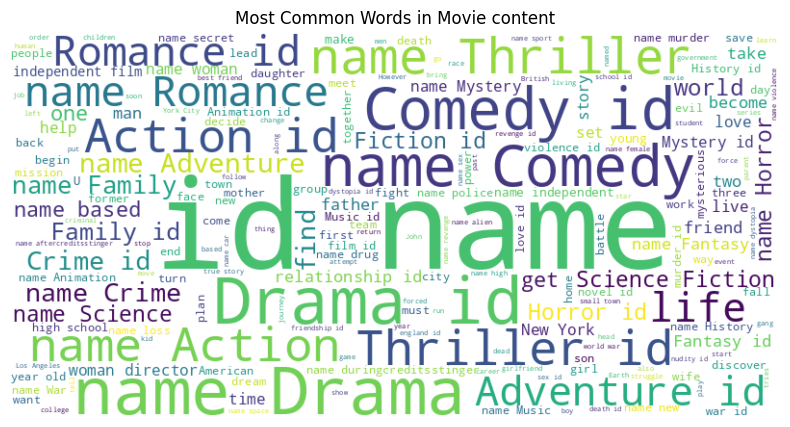

In [28]:
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

# Join all the movie content into a single string
all_content = ' '.join(data['combined'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_set).generate(all_content)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [29]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stop_words = set(stopwords.words('english'))

In [31]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [32]:
import ast

def extract_names(obj):
    try:
        data = ast.literal_eval(obj)   # convert string to list of dicts
        return " ".join([d['name'] for d in data])
    except:
        return ""


In [33]:
df['genres'] = df['genres'].apply(extract_names)
df['keywords'] = df['keywords'].apply(extract_names)


In [34]:
df['combined'] = df['genres'] + " " + df['keywords'] + " " + df['overview']


In [35]:
data['cleaned_text'] = df['combined'].apply(preprocess_text)

/tmp/ipython-input-1183214757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


In [36]:
data.head()

,title_x,combined,cleaned_text
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",action adventure fantasy science fiction cultu...
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",adventure fantasy action ocean drug abuse exot...
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",action adventure crime spy based novel secret ...
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",action crime drama thriller dc comics crime fi...
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",action adventure science fiction based novel m...


In [37]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [38]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [39]:
print(cosine_sim[1])

[0.02391095 1.         0.02368238 ... 0.02216394 0.         0.        ]


In [40]:
# Recommendation Function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
    # Find the index of the movie
    idx = df[df['title_x'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top n similar movies
    return df[['title_x']].iloc[movie_indices]

In [41]:
data["title_x"]

,title_x
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4795,El Mariachi
4796,Newlyweds
4797,"Signed, Sealed, Delivered"
4798,Shanghai Calling


In [42]:
row_index = df[df['title_x'] == "Avengers: Age of Ultron"].index
print(row_index)

Index([7], dtype='int64')


In [43]:
movie_name = data["title_x"][7]
print(movie_name)

Avengers: Age of Ultron


In [44]:
print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the Movie Avengers: Age of Ultron
                       title_x
68                    Iron Man
79                  Iron Man 2
16                The Avengers
31                  Iron Man 3
26  Captain America: Civil War
